### Aplicando trasformações em um objeto STL

In [ ]:
!pip install numpy-stl

     |████████████████████████████████| 481kB 5.8MB/s 
  Created wheel for numpy-stl: filename=numpy_stl-2.13.0-cp36-cp36m-linux_x86_64.whl size=133504 sha256=8e13148c44bb1f06bc155bd9ed6edb8acc55f9ef5d94ef376916ffb5df2be233
  Stored in directory: /root/.cache/pip/wheels/88/91/7e/547e38f7595910738c22d9c0bb5796dc55a71e61058f26d4bf
Successfully built numpy-stl


In [ ]:
from stl import mesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, art3d  
from math import pi,cos,sin

# Complementary function to make the 3D axes aspect equal 

def set_axes_equal(ax):
    #Make axes of 3D plot have equal scale so that spheres appear as spheres,
    #cubes as cubes, etc..  This is one possible solution to Matplotlib's
    #ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    #Input
    #  ax: a matplotlib axis, e.g., as output from plt.gca().
    
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

# Function for building the Rotation Matrix around the Z-axes
def z_rotation(angle):
    rotation_matrix=np.array([[cos(angle),-sin(angle),0,0],[sin(angle),cos(angle),0,0],[0,0,1,0],[0,0,0,1]])
    return rotation_matrix

# Function for building the Translation Matrix
def move(dx,dy,dz):
    translation = np.array([dx,dy,dz,1])
    T = np.eye(4)
    T[:,-1]=translation.T
    return T


Translation Matrix: 
 [[ 1.  0.  0. 50.]
 [ 0.  1.  0. 10.]
 [ 0.  0.  1.  5.]
 [ 0.  0.  0.  1.]]


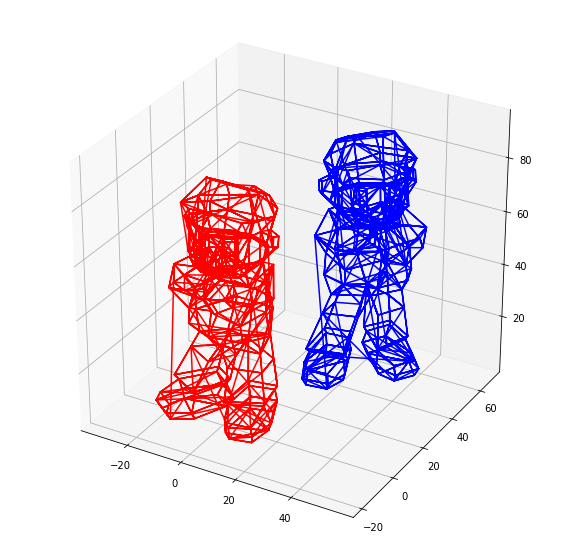

In [ ]:
# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file('mario.STL')

# Get the x, y, z coordinates contained in the mesh structure that are the 
# vertices of the triangular faces of the object
x = your_mesh.x.flatten()
y = your_mesh.y.flatten()
z = your_mesh.z.flatten()

# Create the 3D object from the x,y,z coordinates and add the additional array of ones to 
# represent the object using homogeneous coordinates
kong = np.array([x.T,y.T,z.T,np.ones(x.size)])



#Define the translation matrix
T = move(50,10,5)
print('Translation Matrix: \n',T)

#Rotate the house along the z-axis
rotation_angle = pi/4 #in radians
Rz = z_rotation(rotation_angle)


#Translate the house
new_kong = np.dot(T,kong)
new_kong = np.dot(Rz,new_kong)

figure = plt.figure(figsize=(10,10))
ax0 = plt.axes(projection='3d')
#plot original house in red
ax0.plot3D(kong[0,:], kong[1,:], kong[2,:], 'red')
#plot new house in blue
ax0.plot3D(new_kong[0,:],new_kong[1,:],new_kong[2,:], 'blue')
set_axes_equal(ax0)

